# Bonus - Cars - Enriched Dataset

👇 Import the dataset `cars_bonus.csv` located in the `data` folder.

In [1]:
%load_ext autoreload
%autoreload 2

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from statsmodels.graphics.gofplots import qqplot

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
cars = pd.read_csv("../data/cars_bonus.csv")
cars.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars["cylindernumber"] = cars["cylindernumber"].map({"four":4, "six":6, "five":5, "eight":8, "two":2, "three":3, "twelve":12})
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
for idx, row in cars.iterrows():
    cars.loc[idx,'CarBrand'] = re.findall(r'([^\s]+)', row['CarName'])[0]

In [8]:
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [9]:
target = cars.price
target

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [10]:
inputs = cars.drop(columns=['price'])
inputs.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarBrand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi


👇 Do the preprocessing required and train the best model you possibly can to predict the price of a car

# 1. Missing values

In [11]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
CarBrand            0
dtype: int64

No missing values in this dataset... Unrealistic situation but let's ignore this fact for the exercice :) <br/>
Remember that in the challenge 01, we used two imputers:
* Simple Imputer
* KNN Imputer

# 2. Encoding

## 2.1 What are the categorical columns ?

In [12]:
inputs_cat = inputs.select_dtypes(include=['object'])
inputs_cat.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarBrand
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,mpfi,alfa-romero
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,mpfi,alfa-romero
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,mpfi,audi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,mpfi,audi


In [13]:
inputs_cat.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'CarBrand'],
      dtype='object')

## 3.2 Which features  need to be encoded and how ?

In [14]:
cat_features = list(set(list(inputs_cat.columns)) - set(['CarName','CarBrand']))
cat_features

['drivewheel',
 'fuelsystem',
 'doornumber',
 'carbody',
 'fueltype',
 'enginetype',
 'aspiration',
 'enginelocation']

In [15]:
inputs_cat_enc = inputs_cat[cat_features].copy()
inputs_cat_enc.head()

,drivewheel,fuelsystem,doornumber,carbody,fueltype,enginetype,aspiration,enginelocation
0,rwd,mpfi,two,convertible,gas,dohc,std,front
1,rwd,mpfi,two,convertible,gas,dohc,std,front
2,rwd,mpfi,two,hatchback,gas,ohcv,std,front
3,fwd,mpfi,four,sedan,gas,ohc,std,front
4,4wd,mpfi,four,sedan,gas,ohc,std,front


In [16]:
cat_features_nunique = pd.DataFrame(inputs_cat_enc.nunique())\
                        .reset_index()\
                        .rename(columns={'index':'cat_features',0:'occurences'})\
                        .sort_values(by='occurences',ascending=False)
cat_features_nunique                                            

,cat_features,occurences
1,fuelsystem,8
5,enginetype,7
3,carbody,5
0,drivewheel,3
2,doornumber,2
4,fueltype,2
6,aspiration,2
7,enginelocation,2


In [17]:
len(cat_features_nunique)

8

### 2.2.1 Label Encoding for binary classification

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
cat_label_enc = list(cat_features_nunique['cat_features'][cat_features_nunique.occurences<3])
cat_label_enc

['doornumber', 'fueltype', 'aspiration', 'enginelocation']

In [20]:
len(cat_label_enc)

4

In [21]:
for _ in cat_label_enc:
    inputs_cat_enc[_] = LabelEncoder().fit_transform(inputs_cat[_])
    
inputs_cat_enc

,drivewheel,fuelsystem,doornumber,carbody,fueltype,enginetype,aspiration,enginelocation
0,rwd,mpfi,1,convertible,1,dohc,0,0
1,rwd,mpfi,1,convertible,1,dohc,0,0
2,rwd,mpfi,1,hatchback,1,ohcv,0,0
3,fwd,mpfi,0,sedan,1,ohc,0,0
4,4wd,mpfi,0,sedan,1,ohc,0,0
...,...,...,...,...,...,...,...,...
200,rwd,mpfi,0,sedan,1,ohc,0,0
201,rwd,mpfi,0,sedan,1,ohc,1,0
202,rwd,mpfi,0,sedan,1,ohcv,0,0
203,rwd,idi,0,sedan,0,ohc,1,0


### 2.2.2 One Hot Encoder for multiclass variables

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
cat_ohe_enc = list(set(inputs_cat_enc) - set(cat_label_enc))
cat_ohe_enc

['drivewheel', 'carbody', 'enginetype', 'fuelsystem']

In [24]:
len(cat_ohe_enc)

4

In [25]:
for _ in cat_ohe_enc:
    ohe = OneHotEncoder(sparse=False)
    feature_ohe = ohe.fit_transform(inputs_cat[[_]])
    inputs_cat_enc[list(ohe.categories_[0])] = feature_ohe
    
inputs_cat_enc

,drivewheel,fuelsystem,doornumber,carbody,fueltype,enginetype,aspiration,enginelocation,4wd,fwd,rwd,convertible,hardtop,hatchback,sedan,wagon,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,rwd,mpfi,1,convertible,1,dohc,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,rwd,mpfi,1,convertible,1,dohc,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,rwd,mpfi,1,hatchback,1,ohcv,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,fwd,mpfi,0,sedan,1,ohc,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4wd,mpfi,0,sedan,1,ohc,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,rwd,mpfi,0,sedan,1,ohc,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,rwd,mpfi,0,sedan,1,ohc,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,rwd,mpfi,0,sedan,1,ohcv,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,rwd,idi,0,sedan,0,ohc,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
inputs_cat_enc.drop(columns=cat_ohe_enc,inplace=True)
inputs_cat_enc

,doornumber,fueltype,aspiration,enginelocation,4wd,fwd,rwd,convertible,hardtop,hatchback,sedan,wagon,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,1,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# 3. Scaling the numerical features

## 3.1 What are my numerical columns ? 

In [34]:
inputs_num = inputs._get_numeric_data().drop(columns=['car_ID','symboling'])
inputs_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22


In [35]:
num_features = list(inputs_num.columns)
num_features

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [36]:
len(num_features)

14

## 3.2 Inspecting distributions and outliers

/Users/davywai/.pyenv/versions/3.7.6/envs/lewagon/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/davywai/.pyenv/versions/3.7.6/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
/Users/davywai/.pyenv/versions/3.7.6/envs/lewagon/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Fut

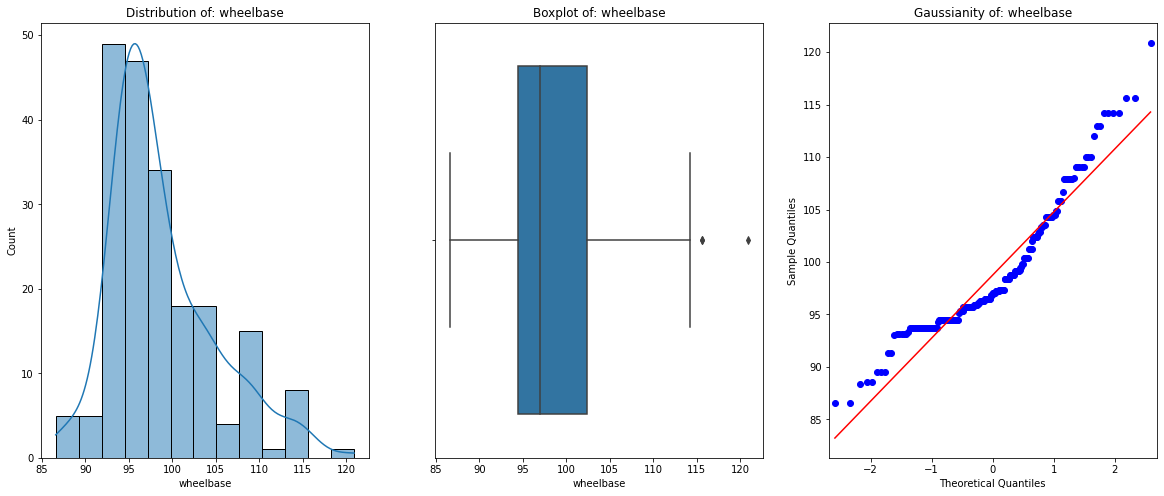

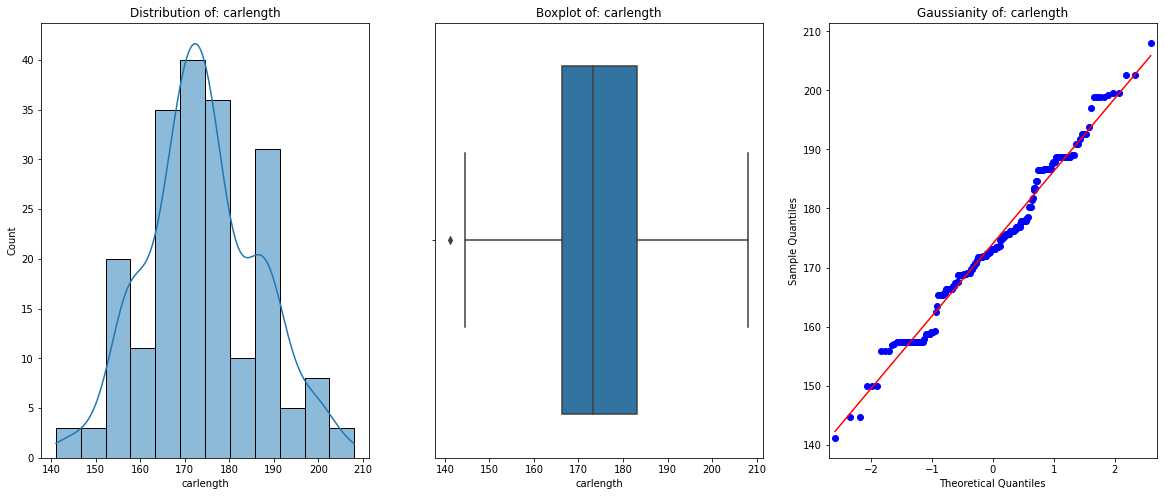

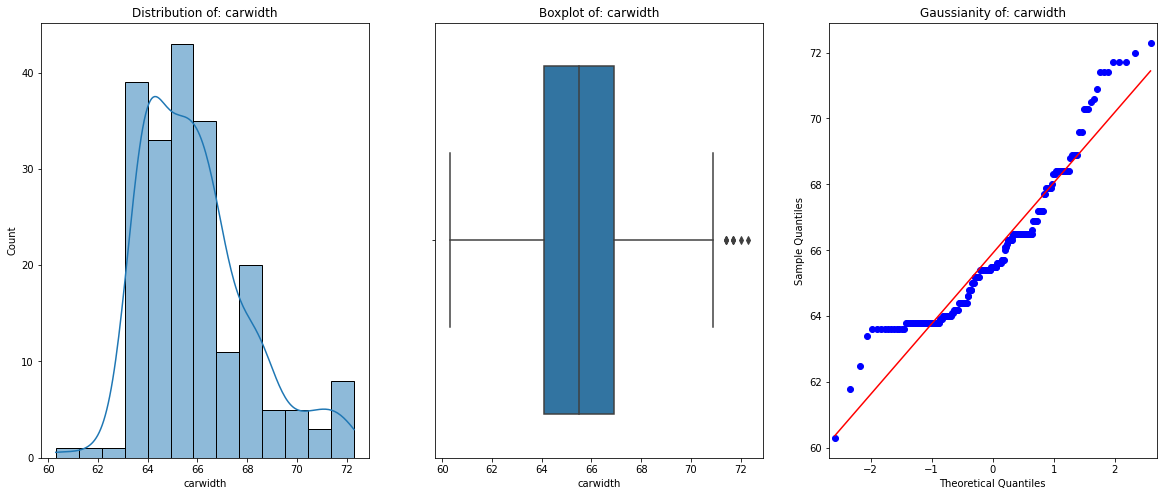

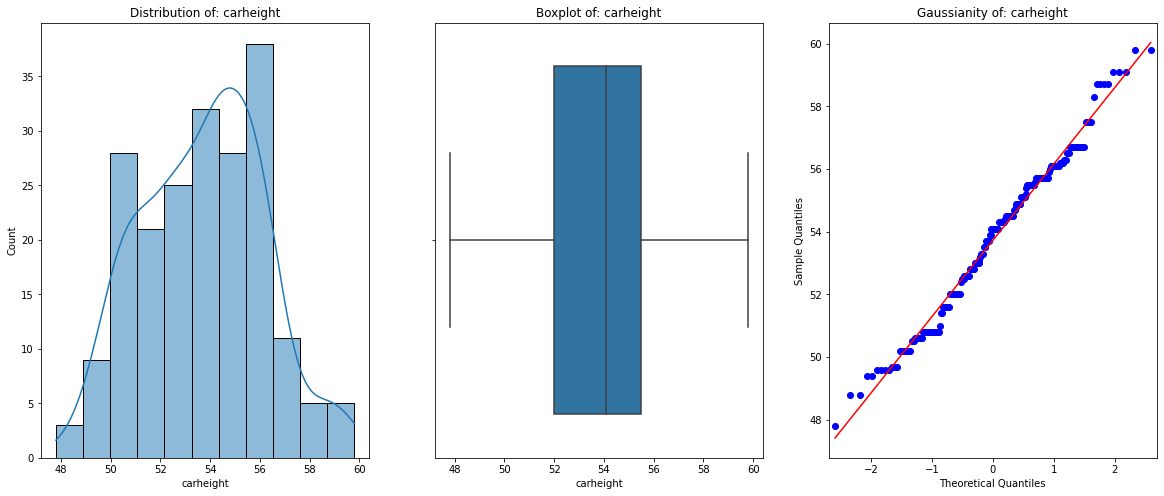

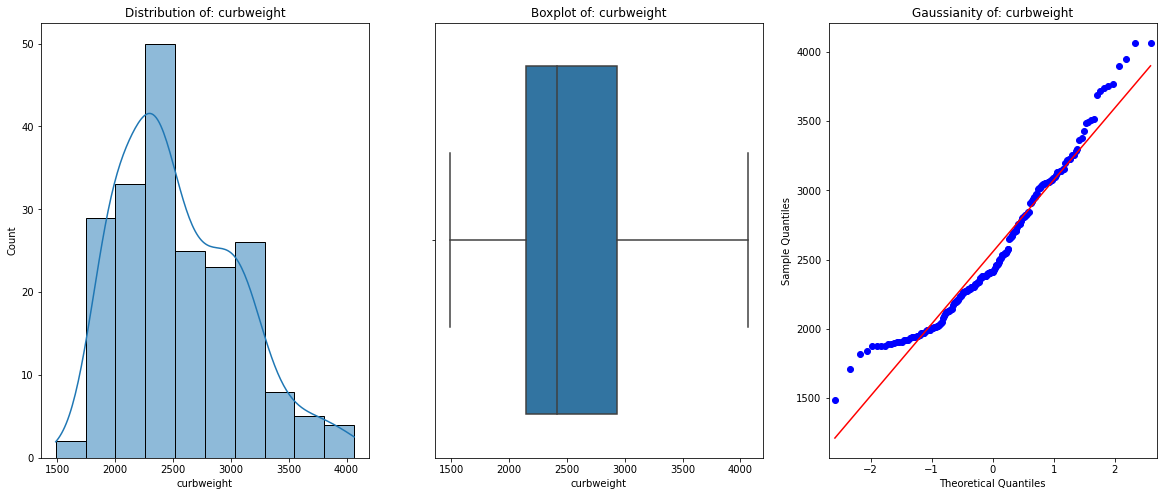

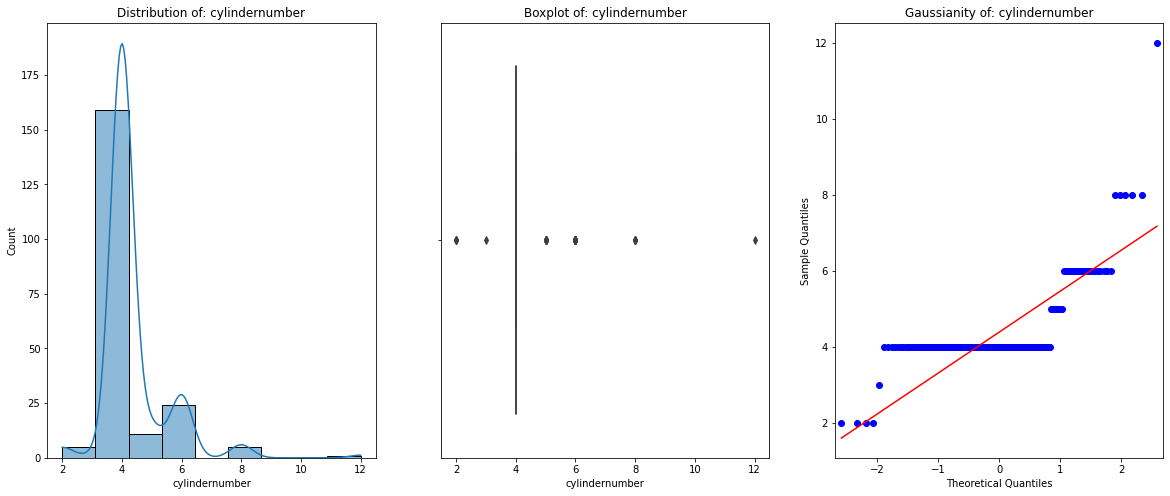

In [ ]:
for numerical_feature in num_features:
    
    fig, ax =plt.subplots(1,3,figsize=(20,8))
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = inputs_num[numerical_feature], kde=True, ax=ax[0])
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(inputs_num[numerical_feature], ax=ax[1])
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(inputs_num[numerical_feature],line='s',ax=ax[2])
    fig.show()

In [ ]:
# fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(15,20))

# for (_,ax) in zip(num_features,axes.flat):
#     ax.set_title(f"{_}")
#     # ax.set_xlim(0, 40)
#     ax = plt.box(inputs_num[_])



## 3.3 Scaling features with a good strategy

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()
rb_scaler = RobustScaler()

In [37]:
inputs_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22


In [38]:
inputs_num_scaled = inputs_num.copy()

In [39]:
mm_features = ['wheelbase','carwidth','carheight','compressionratio','horsepower','peakrpm','citympg']
ss_features = ['carlength','highwaympg']
rb_features = ['curbweight','cylindernumber','enginesize','boreratio','stroke']

inputs_num_scaled[mm_features] = mm_scaler.fit_transform(inputs_num[mm_features])
inputs_num_scaled[ss_features] = ss_scaler.fit_transform(inputs_num[ss_features])
inputs_num_scaled[rb_features] = rb_scaler.fit_transform(inputs_num[rb_features])

inputs_num_scaled

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.058309,-0.426521,0.316667,0.083333,0.169620,0.0,0.227273,0.372093,-2.033333,0.12500,0.262500,0.346939,0.222222,-0.546059
1,0.058309,-0.426521,0.316667,0.083333,0.169620,0.0,0.227273,0.372093,-2.033333,0.12500,0.262500,0.346939,0.222222,-0.546059
2,0.230321,-0.231513,0.433333,0.383333,0.517722,2.0,0.727273,-1.465116,0.600000,0.12500,0.441667,0.346939,0.166667,-0.691627
3,0.384840,0.207256,0.491667,0.541667,-0.097468,0.0,-0.250000,-0.279070,0.366667,0.18750,0.225000,0.551020,0.305556,-0.109354
4,0.373178,0.207256,0.508333,0.541667,0.518987,1.0,0.363636,-0.279070,0.366667,0.06250,0.279167,0.551020,0.138889,-1.273900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.655977,1.198549,0.716667,0.641667,0.681013,0.0,0.477273,1.093023,-0.466667,0.15625,0.275000,0.510204,0.277778,-0.400490
201,0.655977,1.198549,0.708333,0.641667,0.803797,0.0,0.477273,1.093023,-0.466667,0.10625,0.466667,0.469388,0.166667,-0.837195
202,0.655977,1.198549,0.716667,0.641667,0.756962,2.0,1.204545,0.627907,-1.400000,0.11250,0.358333,0.551020,0.138889,-1.128332
203,0.655977,1.198549,0.716667,0.641667,1.016456,2.0,0.568182,-0.697674,0.366667,1.00000,0.241667,0.265306,0.361111,-0.546059


In [40]:
# inputs_num_scaled[list(inputs_num.columns)] = ss_scaler.fit_transform(inputs_num[list(inputs_num.columns)])
# inputs_num_scaled

# 4. Price Modelling

In [41]:
target

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [42]:
inputs_cat_enc.head(3)

,aspiration,enginelocation,doornumber,fueltype,4wd,fwd,rwd,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,convertible,hardtop,hatchback,sedan,wagon,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,1,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,1,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
inputs_num_scaled.head(3)

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.058309,-0.426521,0.316667,0.083333,0.169620,0.0,0.227273,0.372093,-2.033333,0.125,0.262500,0.346939,0.222222,-0.546059
1,0.058309,-0.426521,0.316667,0.083333,0.169620,0.0,0.227273,0.372093,-2.033333,0.125,0.262500,0.346939,0.222222,-0.546059
2,0.230321,-0.231513,0.433333,0.383333,0.517722,2.0,0.727273,-1.465116,0.600000,0.125,0.441667,0.346939,0.166667,-0.691627


In [44]:
processed_inputs = pd.concat([inputs_cat_enc,inputs_num_scaled],axis=1)
processed_inputs

,aspiration,enginelocation,doornumber,fueltype,4wd,fwd,rwd,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,convertible,hardtop,hatchback,sedan,wagon,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0,0,1,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.058309,-0.426521,0.316667,0.083333,0.169620,0.0,0.227273,0.372093,-2.033333,0.12500,0.262500,0.346939,0.222222,-0.546059
1,0,0,1,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.058309,-0.426521,0.316667,0.083333,0.169620,0.0,0.227273,0.372093,-2.033333,0.12500,0.262500,0.346939,0.222222,-0.546059
2,0,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.230321,-0.231513,0.433333,0.383333,0.517722,2.0,0.727273,-1.465116,0.600000,0.12500,0.441667,0.346939,0.166667,-0.691627
3,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.384840,0.207256,0.491667,0.541667,-0.097468,0.0,-0.250000,-0.279070,0.366667,0.18750,0.225000,0.551020,0.305556,-0.109354
4,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.373178,0.207256,0.508333,0.541667,0.518987,1.0,0.363636,-0.279070,0.366667,0.06250,0.279167,0.551020,0.138889,-1.273900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.655977,1.198549,0.716667,0.641667,0.681013,0.0,0.477273,1.093023,-0.466667,0.15625,0.275000,0.510204,0.277778,-0.400490
201,1,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.655977,1.198549,0.708333,0.641667,0.803797,0.0,0.477273,1.093023,-0.466667,0.10625,0.466667,0.469388,0.166667,-0.837195
202,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.655977,1.198549,0.716667,0.641667,0.756962,2.0,1.204545,0.627907,-1.400000,0.11250,0.358333,0.551020,0.138889,-1.128332
203,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.655977,1.198549,0.716667,0.641667,1.016456,2.0,0.568182,-0.697674,0.366667,1.00000,0.241667,0.265306,0.361111,-0.546059


## 4.1 Linear Regression on Price

### 4.1.1 LR Baseline

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(processed_inputs, target, test_size = 0.3,random_state=5)

lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, y_train)

print(f"Score : {lin_reg_model.score(X_test, y_test)}")

Score : 0.8327301508397058


### 4.1.2 After feature permutation

In [46]:
from sklearn.inspection import permutation_importance

In [47]:
permutation_score = permutation_importance(lin_reg_model, X_train, y_train, n_repeats=100,random_state=5)

In [48]:
features_df = pd.DataFrame(np.vstack((X_train.columns, permutation_score.importances_mean)).T,
                           columns = ['feature','importance'])\
            .sort_values('importance', ascending = False).reset_index(drop=True)

features_df.head(20)

,feature,importance
0,enginesize,2.81853
1,compressionratio,0.846345
2,boreratio,0.272234
3,fueltype,0.204886
4,idi,0.204886
5,stroke,0.196238
6,cylindernumber,0.188186
7,curbweight,0.149651
8,ohcv,0.106174
9,carwidth,0.0718697


In [50]:
threshold = np.arange(0.01,0.30,0.01)
threshold

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29])

In [51]:
features_df.query("importance > 0.6")

,feature,importance
0,enginesize,2.81853
1,compressionratio,0.846345


In [46]:
top_10_features = features_df['feature'].iloc[0:14]

lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train[top_10_features], y_train)

print(f"Score : {lin_reg_model.score(X_test[top_10_features], y_test)}")

Score : 0.8732833040622119


## 4.2 Classification

## 4.2.1 What is the distribution of the target `price` ?

<AxesSubplot:xlabel='price', ylabel='Count'>

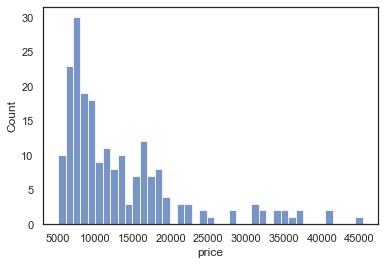

In [47]:
sns.histplot(target,bins=int(len(cars)/5))

/Users/davywai/.pyenv/versions/3.7.6/envs/lewagon/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

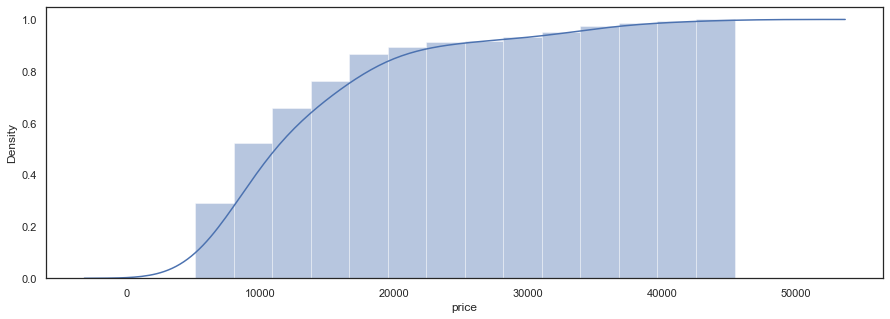

In [48]:
plt.figure(figsize=(15,5))
kwargs = {'cumulative': True}
sns.distplot(target, hist_kws=kwargs, kde_kws=kwargs)

<AxesSubplot:xlabel='price', ylabel='Density'>

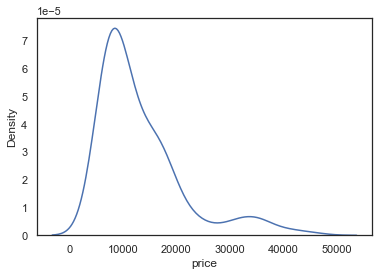

In [49]:
sns.kdeplot(target)

In [50]:
target.max()

45400.0

/Users/davywai/.pyenv/versions/3.7.6/envs/lewagon/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

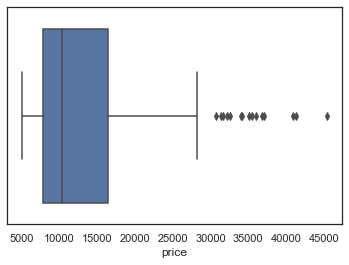

In [51]:
sns.boxplot(target)

In [123]:
car_classification = ["entry_level","mid_range","better_car","premium_car"]

In [52]:
entry_level = 10_000
mid_range = 15_000
better_car = 20_000
premium_car = 30_000

In [94]:
# Is there a more-elegant-way to do that ?

def car_cat(price):
    if price < entry_level:
        return 'entry_level'
    elif price < mid_range:
        return 'mid_range'
    elif price < better_car:
        return 'better_car'
    else:
        return 'premium_car'
    
# range_key_dict = RangeKeyDict({
#         (0, entry_level): 'entry_level',
#         (entry_level, mid_range): 'mid_range',
#         (better_car, premium_car): 'better_car',
#         (premium_car, 200_000): 'premium_car',
#     })

In [101]:
target_cat = target.map(car_cat)
target_cat

0        mid_range
1       better_car
2       better_car
3        mid_range
4       better_car
          ...     
200     better_car
201     better_car
202    premium_car
203    premium_car
204    premium_car
Name: price, Length: 205, dtype: object

In [104]:
from sklearn.preprocessing import LabelEncoder

target_cat_enc = pd.Series(LabelEncoder().fit_transform(target_cat))
target_cat_enc

0      2
1      0
2      0
3      2
4      0
      ..
200    0
201    0
202    3
203    3
204    3
Length: 205, dtype: int64

### 4.2.2 Multiclass Logistic "Regression"

In [105]:
from sklearn.linear_model import LogisticRegression

In [113]:
y_train_cat = y_train.map(car_cat)
y_train_cat_enc = pd.Series(LabelEncoder().fit_transform(y_train_cat))
y_test_cat = y_test.map(car_cat)
y_test_cat_enc = pd.Series(LabelEncoder().fit_transform(y_test_cat))

In [114]:
log_reg = LogisticRegression(max_iter = 1000)

log_reg.fit(X_train,y_train_cat_enc)

print(f"Score : {log_reg.score(X_test,y_test_cat_enc)}")

Score : 0.7419354838709677


In [122]:
from sklearn.metrics import confusion_matrix

In [131]:
y_pred_log_reg = pd.Series(log_reg.predict(X_test))
y_pred_log_reg

0     1
1     1
2     0
3     3
4     1
     ..
57    2
58    0
59    0
60    2
61    0
Length: 62, dtype: int64

In [132]:
y_test_cat_enc

0     1
1     1
2     0
3     3
4     1
     ..
57    0
58    1
59    1
60    0
61    0
Length: 62, dtype: int64

In [137]:
confusion_matrix(y_test_cat_enc, y_pred_log_reg, labels=np.arange(0,4,1))

array([[ 8,  0,  4,  0],
       [ 2, 29,  1,  0],
       [ 1,  6,  4,  1],
       [ 1,  0,  0,  5]])

In [138]:
from sklearn.metrics import plot_confusion_matrix

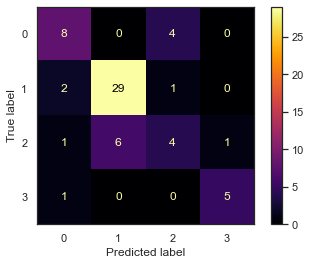

In [152]:
plot_confusion_matrix(log_reg, X_test, y_test_cat_enc,cmap='inferno')

### 4.2.2 K-Nearest-Neighbors-Classifier 

In [115]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Accuracy')

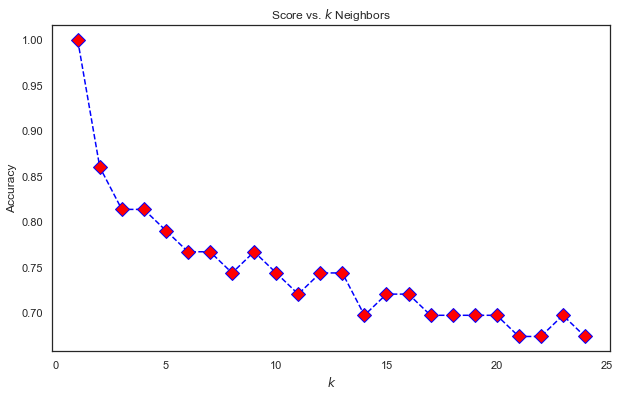

In [116]:
scores = []

X_train_val,X_val,y_train_val,y_val = train_test_split(X_train,y_train_cat_enc,test_size=0.3)

for k in range(1,25):
    
    # Instanciate the model
    knn_model = KNeighborsClassifier(n_neighbors = k)

    # Train the model on the scaled Training data
    knn_model.fit(X_train, y_train_cat_enc)

    # Append the score 
    scores.append(knn_model.score(X_val,y_val))
    
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,25),scores,color='blue', linestyle='dashed', marker='D',markerfacecolor='red', markersize=10)
plt.title('Score vs. $k$ Neighbors')
plt.xlabel('$k$')
plt.ylabel('Accuracy')

In [119]:
# how many neighbors ?
import numpy as np
optimal_k = np.argmax(scores)+4
optimal_k

4

In [121]:
best_knn_model = KNeighborsClassifier(n_neighbors=optimal_k)

best_knn_model.fit(X_train_val, y_train_val)

best_knn_score_test = best_knn_model.score(X_test,y_test_cat_enc)

best_knn_score_test

0.7580645161290323

In [154]:
y_pred_best_knn = best_knn_model.predict(X_test)

In [155]:
confusion_matrix(y_test_cat_enc, y_pred_best_knn, labels=np.arange(0,4,1))

array([[ 9,  0,  3,  0],
       [ 1, 31,  0,  0],
       [ 2,  8,  2,  0],
       [ 1,  0,  0,  5]])

In [156]:
from sklearn.metrics import plot_confusion_matrix

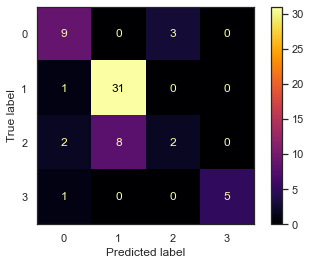

In [157]:
plot_confusion_matrix(best_knn_model, X_test, y_test_cat_enc,cmap='inferno')